### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачівних користувачів

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
cd C:\Users\Jools\Documents\DA\data

C:\Users\Jools\Documents\DA\data


In [7]:
df = pd.read_csv('yulu_rental.csv')

In [13]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

1. Проаналізуємо залежність кількості неформальних користувачів послугою до дня тижня, коли вони скористались нею.  

In [32]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['Date'] = df.datetime.dt.date
df['Day of Week'] = pd.to_datetime(df['Date']).dt.day_name()

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['Day of Week'] = pd.Categorical(df['Day of Week'], categories=day_order, ordered=True)

total_casual_by_day = df.groupby('Day of Week', observed=True)['casual'].sum()
print(total_casual_by_day)

Day of Week
Monday        46288
Tuesday       35365
Wednesday     34931
Thursday      37283
Friday        47402
Saturday     100782
Sunday        90084
Name: casual, dtype: int64


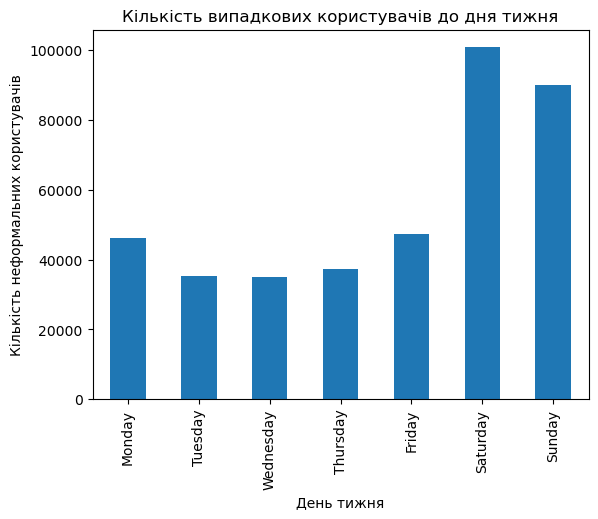

In [72]:
total_casual_by_day.plot.bar()
plt.xlabel('День тижня')
plt.ylabel('Кількість неформальних користувачів')
plt.title('Кількість випадкових користувачів до дня тижня')
plt.show()

Висновки: На даному графіку можна побачити, що найчастіше випадкові незареєстровані користувачі беруть в оренду велосипеди у суботу та неділю, вдвічі більше, аніж у будні дні. Це не дивно - зазвичай на вихідних є тенденція до частіших прогулянок та активного часопроведення. 

Як рекомендацію, можна створити додаткові знижки для поїздок у вихідні дні на першу поїздку як зареєстрований користувач. Це допоможе конвертувати casual користувача в потенційно постійного споживача даної послуги.

2. Проаналізуємо чи існує взаємозв'язок між рівнем вологості та активністю користувачів (зареєстрованих та неформальних).

Кореляція між вологістю і кількістю зареєстрованих користувачів: -0.27
Кореляція між вологістю і кількістю неформальних користувачів: -0.35


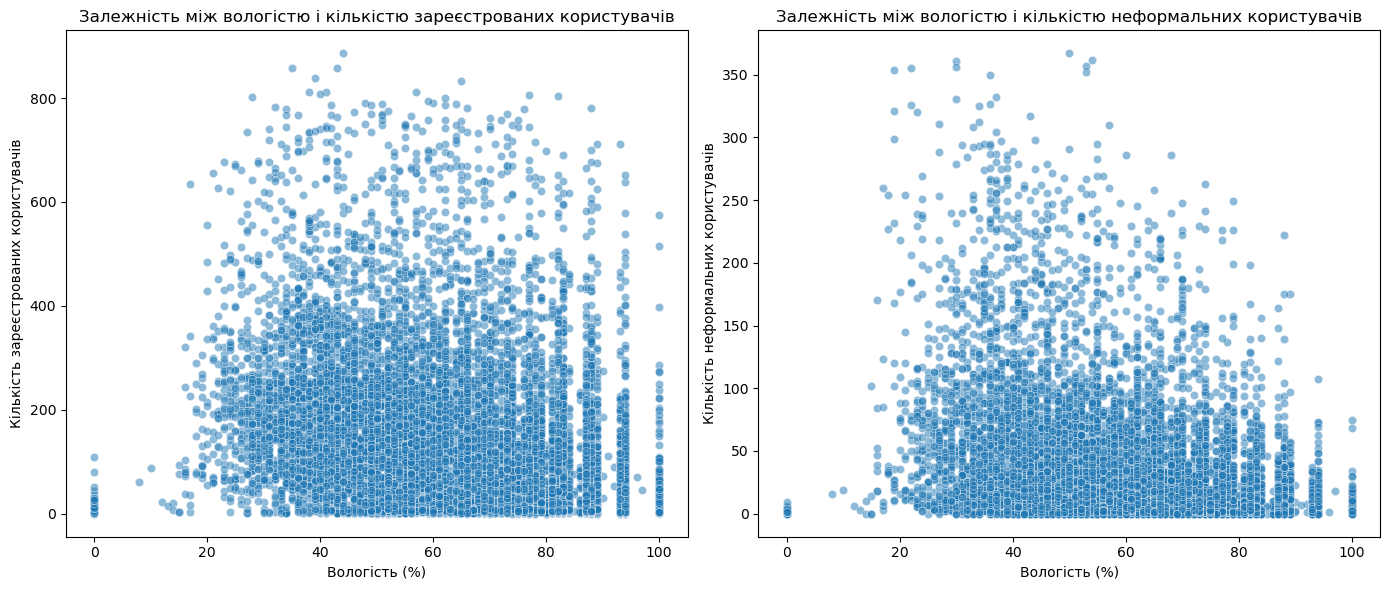

In [52]:
correlation_registered = df['humidity'].corr(df['registered'])
correlation_casual = df['humidity'].corr(df['casual'])

print(f"Кореляція між вологістю і кількістю зареєстрованих користувачів: {correlation_registered:.2f}")
print(f"Кореляція між вологістю і кількістю неформальних користувачів: {correlation_casual:.2f}")

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='humidity', y='registered', data=df, alpha=0.5)
plt.title('Залежність між вологістю і кількістю зареєстрованих користувачів')
plt.xlabel('Вологість (%)')
plt.ylabel('Кількість зареєстрованих користувачів')

plt.subplot(1, 2, 2)
sns.scatterplot(x='humidity', y='casual', data=df, alpha=0.5)
plt.title('Залежність між вологістю і кількістю неформальних користувачів')
plt.xlabel('Вологість (%)')
plt.ylabel('Кількість неформальних користувачів')

plt.tight_layout()
plt.show()

Висновки: 
В цілому, показники кореляції показують, що при збільшенні вологості, зменшується кількість користувачів, як зареєстрованих, так і незареєстрованих. При цьому, показник кореляції складає в середньому 30%, що показує невеликий зв'язок між даними. 

Як рекомендації, можливо варто запропонувати спеціальні знижки у вологі дні, щоб стимулювати активність користувачів.
Також можна розглянути можливість покращення доступності або комфорту велосипедів в умовах вологої погоди, наприклад, наявність захисту від дощу.

Можна зосередити маркетингові кампанії, орієнтовані на хорошу погоду, оскільки користувачі більш активні при низькій вологості.
Оскільки неформальні користувачі є більш чутливими до погодних умов, акції, що спрямовані на цю групу, можуть мати більший вплив у погані погодні дні.

3. Проаналізуємо зміни в кількості оренд по годинах доби.

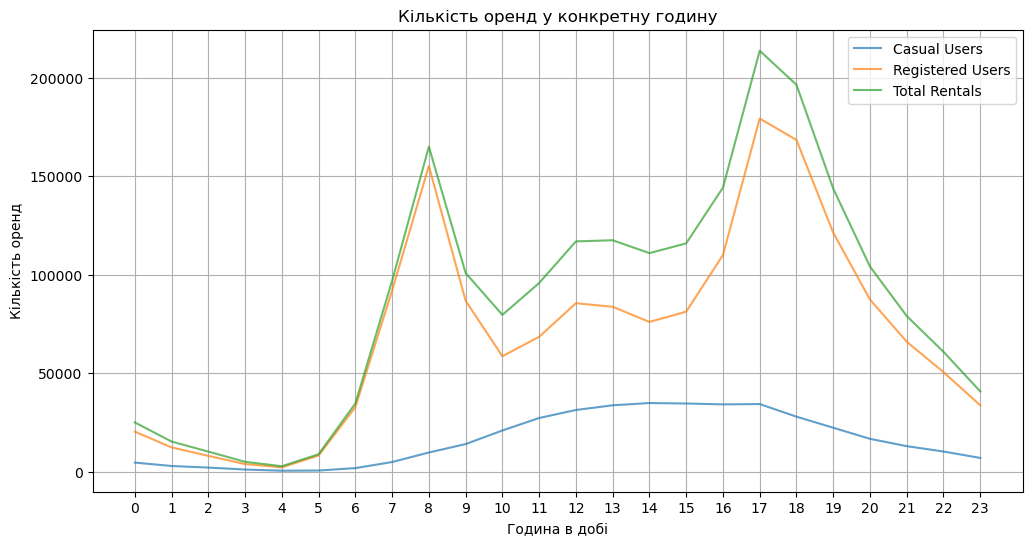

In [59]:
df['hour'] = df['datetime'].dt.hour
rentals_by_hour = df.groupby('hour')[['casual', 'registered', 'count']].sum()

plt.figure(figsize=(12, 6))
plt.plot(rentals_by_hour.index, rentals_by_hour['casual'], label='Casual Users', alpha=0.7)
plt.plot(rentals_by_hour.index, rentals_by_hour['registered'], label='Registered Users', alpha=0.7)
plt.plot(rentals_by_hour.index, rentals_by_hour['count'], label='Total Rentals', alpha=0.7)

plt.title('Кількість оренд у конкретну годину')
plt.xlabel('Година в добі')
plt.ylabel('Кількість оренд')
plt.xticks(range(0, 24))
plt.legend()
plt.grid(True)
plt.show()

Висновки:

Можемо помітити на графіку, що піковими годинами в добі для зареєстрованих користувачів є 8 ранку, згодом 12-13 дня, потім 17-18 години. Ці три часові проміжки скоріш за все пов'язані з тим, що більшість людей зранку користуючись послугою добираються на роботу чи навчання, згодом на обід і потім додому після роботи чи навчання. 

В такому випадку доцільно було би запровадити знижки у менш актуальні години, аби залучити користувачів до використання оренди. Також доцільно на основі цих даних подбати про доступність великої кількості велосипедів у пікові години, аби всі бажаючі користувачі могли скористатись послугою. 

Якщо говорити про неформальних користувачів, то графік показує, що в цілому немає визначених пікових годин у даної категорії, адже люди протягом всього дня користуються послугою +- однаково. Можна створити спеціальні пропозиції або акції для них, доступні в будь-який час доби. Наприклад, знижки на довші поїздки або бонуси за багаторазові оренди протягом дня.

Лінійний розподіл активності неформальних користувачів може вказувати на те, що це туристи або люди, які використовують велосипеди для дозвілля. Компанія може запропонувати вигідні тарифи на прокат велосипедів для туристичних поїздок або створити туристичні маршрути для стимулювання попиту.

Оскільки неформальні користувачі не прив'язані до пікових годин, важливо забезпечити рівномірну доступність велосипедів протягом всього дня в популярних точках.